### Regressão linar por estado
Importar os dados necessários

In [1]:
import pandas as pd
from statsmodels.formula.api import ols
pib = pd.read_csv('dados_estados_pib.csv')
idh = pd.read_csv('dados_estados_idh.csv') #importar eles e as taxas 
taxas = pd.read_csv('taxas_abstencao_estado.csv')

Juntar os dados pelo nome do estado

In [2]:
df = pd.merge(pib, idh, how = 'inner', on = 'estado')
df = pd.merge(df, taxas, how = 'inner', on = 'estado')

In [3]:
df.set_index('estado',inplace = True)

In [4]:
df = df.loc[:,['PIB','IDHM','diferenca']]

In [5]:
df

,PIB,IDHM,diferenca
estado,,,
Pará,20734.60,0.646,23.175765
Tocantins,25021.80,0.699,33.836046
Maranhão,13757.94,0.639,23.090723
Piauí,16125.00,0.646,20.528058
Paraíba,16919.84,0.658,20.519528
Alagoas,17667.79,0.631,23.808995
Acre,17722.41,0.663,21.218460
Ceará,17912.17,0.682,28.580682
Sergipe,19441.23,0.665,24.196082


Modelo utilizando PIB e IDHM como variável

In [6]:
model = ols("diferenca ~ PIB + IDHM", data=df)
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              diferenca   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                 -0.021
Method:                 Least Squares   F-statistic:                    0.7325
Date:                Wed, 29 Jun 2022   Prob (F-statistic):              0.491
Time:                        17:02:32   Log-Likelihood:                -83.514
No. Observations:                  27   AIC:                             173.0
Df Residuals:                      24   BIC:                             176.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5211     32.031     -0.141      0.889     -70.629      61.587
PIB           -0.0002      0.000     -1.191      0.245      -0.001       0.000
IDHM          50.0591     51.344      0.975      0.339     -55.909     156.027
==============================================================================
Omnibus:                       10.705   Durbin-Watson:                   1.053
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                9.147
Skew:                           1.300   Prob(JB):                       0.0103
Kurtosis:                       4.169   Cond. No.                     1.89e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='PIB', ylabel='diferenca'>

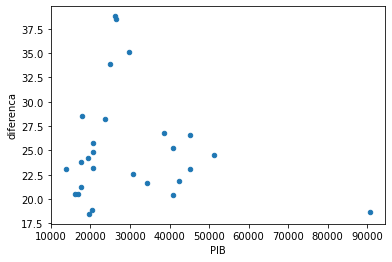

In [7]:
df.plot.scatter('PIB','diferenca')

<AxesSubplot:xlabel='IDHM', ylabel='diferenca'>

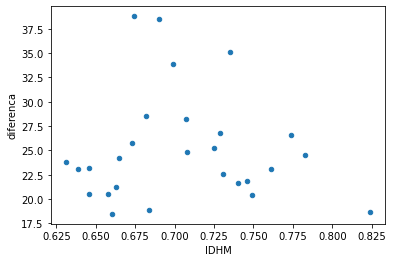

In [8]:
df.plot.scatter('IDHM','diferenca')

Remover Destrito Federal (outlier)

In [9]:
df = df.reset_index()
df

,estado,PIB,IDHM,diferenca
0,Pará,20734.60,0.646,23.175765
1,Tocantins,25021.80,0.699,33.836046
2,Maranhão,13757.94,0.639,23.090723
3,Piauí,16125.00,0.646,20.528058
4,Paraíba,16919.84,0.658,20.519528
5,Alagoas,17667.79,0.631,23.808995
6,Acre,17722.41,0.663,21.218460
7,Ceará,17912.17,0.682,28.580682
8,Sergipe,19441.23,0.665,24.196082
9,Bahia,19716.21,0.660,18.474075


In [10]:
df = df.drop(24)

In [11]:
model = ols("diferenca ~ PIB + IDHM", data=df)
response = model.fit()
response.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              diferenca   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.074
Method:                 Least Squares   F-statistic:                    0.1360
Date:                Wed, 29 Jun 2022   Prob (F-statistic):              0.874
Time:                        17:02:33   Log-Likelihood:                -80.823
No. Observations:                  26   AIC:                             167.6
Df Residuals:                      23   BIC:                             171.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4449     41.128      0.132      0.896     -79.634      90.524
PIB        -9.639e-05      0.000     -0.349      0.730      -0.001       0.000
IDHM          32.3231     68.714      0.470      0.643    -109.824     174.470
==============================================================================
Omnibus:                        9.507   Durbin-Watson:                   1.022
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                7.788
Skew:                           1.265   Prob(JB):                       0.0204
Kurtosis:                       3.889   Cond. No.                     2.11e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.11e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:xlabel='PIB', ylabel='diferenca'>

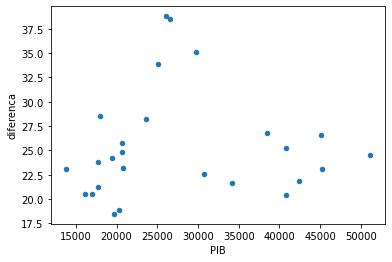

In [12]:
df.plot.scatter('PIB','diferenca')

<AxesSubplot:xlabel='IDHM', ylabel='diferenca'>

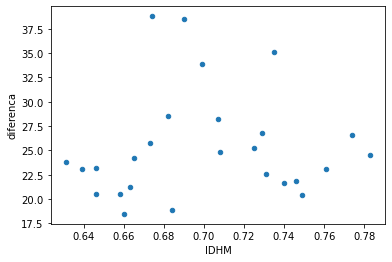

In [13]:
df.plot.scatter('IDHM','diferenca')